In [2]:
%pip install catboost
%pip install xgboost
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import numpy as np

In [15]:
# --- LOAD DATA ---
try:
    df = pd.read_csv('spotify_cleaned.csv')
 
    print("File loaded successfully.")
    df['pop_bucket']=df['pop_bucket'].apply(lambda x:x-1)
    # Bucket 'popularity'
    # df['popularity_bucket'] = pd.cut(
    #     df['popularity'],
    #     bins=[-1,0,40,60,85],
    #     labels=[1, 2, 3, 4]
    # ).astype(int)

    # print("Bucketing completed. Here's a sample:")
    # print(df[['popularity', 'popularity_bucket']].head())
    print(df.head(5))
except FileNotFoundError:
    print("Error: File 'spotify_cleaned.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: 'spotify_cleaned.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'spotify_cleaned.csv'. Check file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

File loaded successfully.
   Unnamed: 0.1  Unnamed: 0          artist_name         track_name  \
0          1044        1044  Menahan Street Band  Seven Is the Wind   
1       1130163     1424053            Flatsound         We'll Live   
2        927251     1121151              Subhira      Ruta del Inca   
3        275932      275932        Scary Pockets         Wonderwall   
4        834627      981623    Pain of Salvation        Iter Impius   

                 track_id  popularity  year     genre  danceability  energy  \
0  5qh2fad21W9se0d4IpKcyi          22  2012  afrobeat         0.525   0.577   
1  1XuAT2hAkjDvGqd4MMv2wL          16  2011       emo         0.339   0.624   
2  0ID7odbzAGY7C9cP2PzLRX           0  2007  afrobeat         0.552   0.766   
3  120tmueqvWTGdHET4u5sPP          36  2017      funk         0.756   0.732   
4  12kxpEvK9B99z02rNRmnSF          26  2004   swedish         0.437   0.584   

   ...  speechiness  acousticness  instrumentalness  liveness  valence  

Use a tree model like XGBoost. Better for tabular data and known features.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

Starting run 1
Starting run 2
Starting run 3
Starting run 4
Starting run 5
Starting run 6
Starting run 7
Starting run 8
Starting run 9
Starting run 10
Categorical columns encoded: ['artist_name', 'track_name', 'track_id', 'genre', 'decade']

Training Random Forest...
Pred Proba: [[0.     0.055  0.19   0.755 ]
 [0.     0.115  0.6575 0.2275]
 [0.     0.03   0.3375 0.6325]
 ...
 [0.     0.0025 0.14   0.8575]
 [0.     0.0525 0.38   0.5675]
 [0.     0.03   0.3775 0.5925]]
name: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      0.02      0.04       178
           2       0.65      0.56      0.60      1409
           3       0.77      0.88      0.82      2411

    accuracy                           0.73      4000
   macro avg       0.55      0.37      0.37      4000
weighted avg       0.73      0.73      0.71      4000



C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

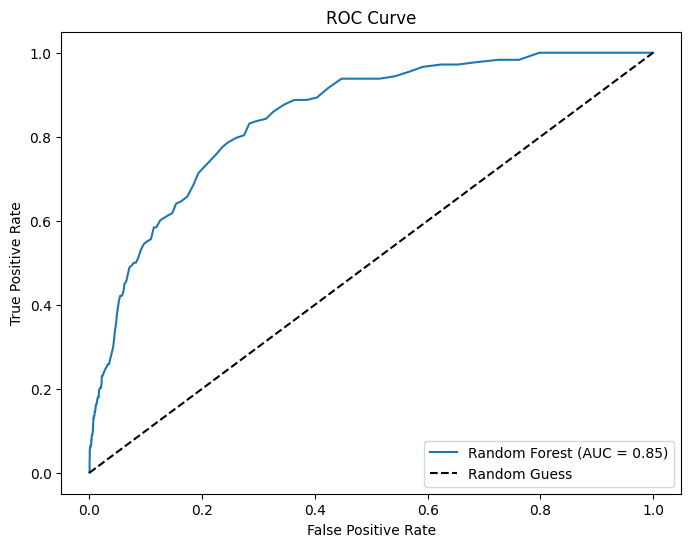


Feature Importances:
genre: 0.0736
Unnamed: 0.1: 0.0725
Unnamed: 0: 0.0723
duration_ms: 0.0649
instrumentalness: 0.0593
danceability: 0.0587
loudness: 0.0555
acousticness: 0.0546
energy: 0.0536
speechiness: 0.0508
valence: 0.0484
year: 0.0482
track_name: 0.0476
artist_name: 0.0473
liveness: 0.0470
tempo: 0.0469
track_id: 0.0446
key: 0.0271
decade: 0.0144
mode: 0.0072
time_signature: 0.0055

Training XGBoost...


c:\Users\JoshL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:22:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pred Proba: [[6.39396676e-05 1.01561993e-02 1.85778782e-01 8.04001093e-01]
 [4.06544350e-05 5.79282530e-02 7.06966698e-01 2.35064432e-01]
 [2.17497454e-05 2.13273801e-03 8.42758477e-01 1.55087098e-01]
 ...
 [1.26737095e-05 4.21331450e-03 1.90445483e-01 8.05328548e-01]
 [2.95244226e-05 9.96278226e-03 4.18107569e-01 5.71900129e-01]
 [2.88780157e-05 1.33754779e-02 2.44830385e-01 7.41765201e-01]]
name: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.61      0.10      0.17       178
           2       0.68      0.68      0.68      1409
           3       0.82      0.87      0.85      2411

    accuracy                           0.77      4000
   macro avg       0.53      0.41      0.42      4000
weighted avg       0.76      0.77      0.76      4000



C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

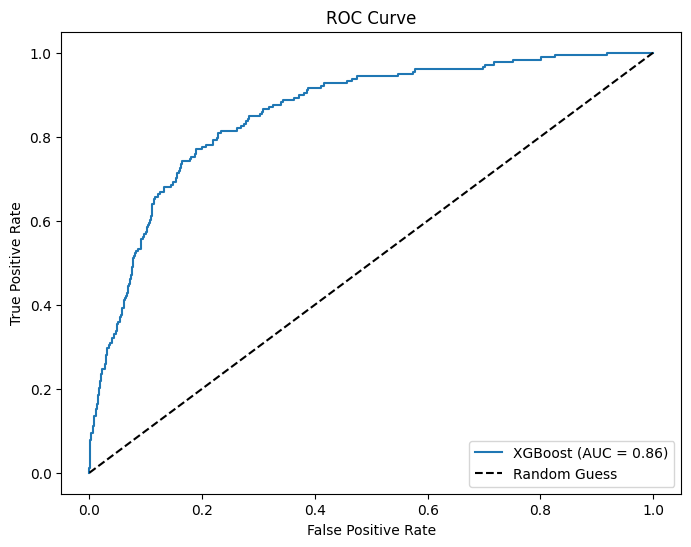


Feature Importances:
year: 0.1688
genre: 0.1387
instrumentalness: 0.0930
Unnamed: 0.1: 0.0538
duration_ms: 0.0526
danceability: 0.0496
loudness: 0.0450
acousticness: 0.0426
energy: 0.0417
valence: 0.0370
speechiness: 0.0364
liveness: 0.0321
time_signature: 0.0313
track_name: 0.0313
artist_name: 0.0310
tempo: 0.0308
track_id: 0.0284
key: 0.0282
mode: 0.0277
Unnamed: 0: 0.0000
decade: 0.0000

Training CatBoost...
Pred Proba: [[5.97775568e-04 2.59564321e-02 1.04088338e-01 8.69357455e-01]
 [1.28042086e-04 8.26156150e-02 7.91074574e-01 1.26181769e-01]
 [1.83610927e-04 1.68159324e-02 5.45399079e-01 4.37601377e-01]
 ...
 [8.59225474e-05 4.34203743e-03 1.64575857e-01 8.30996183e-01]
 [7.39927496e-05 2.00081619e-02 3.72709632e-01 6.07208214e-01]
 [8.67466325e-05 1.32672321e-02 4.27237253e-01 5.59408769e-01]]
name: CatBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.54      0.08      0.

C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

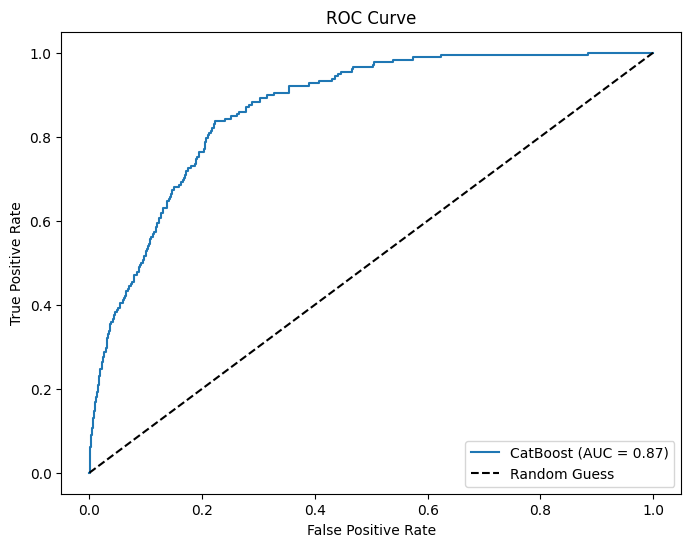


Feature Importances:
genre: 18.2836
instrumentalness: 7.4964
year: 6.1608
duration_ms: 5.5668
danceability: 5.2702
speechiness: 5.2372
artist_name: 5.0929
tempo: 4.8572
acousticness: 4.6788
loudness: 4.5220
track_name: 4.3244
liveness: 4.2719
valence: 4.1207
track_id: 3.9779
energy: 3.9188
Unnamed: 0: 3.4847
key: 3.1235
Unnamed: 0.1: 3.0020
decade: 1.2633
mode: 1.0335
time_signature: 0.3132

Training Logistic Regression...


C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (stat

Pred Proba: [[0.2459212  0.19772577 0.21652536 0.33982767]
 [0.14125802 0.35997736 0.33367588 0.16508874]
 [0.28030215 0.17160568 0.24020985 0.30788232]
 ...
 [0.         0.37222322 0.24239261 0.38538418]
 [0.09200997 0.32724047 0.36172127 0.2190283 ]
 [0.00377864 0.3899692  0.33885039 0.26740177]]
name: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.08      0.38      0.13       178
           2       0.44      0.28      0.34      1409
           3       0.78      0.48      0.60      2411

    accuracy                           0.41      4000
   macro avg       0.32      0.29      0.27      4000
weighted avg       0.63      0.41      0.49      4000



C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


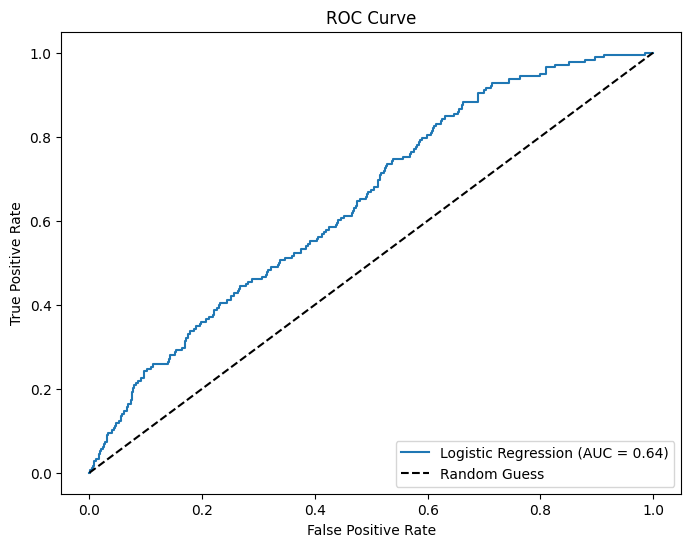


Feature Importances:
Unnamed: 0.1: 0.4409
Unnamed: 0: 0.4409
key: 0.2014
time_signature: 0.0831
genre: 0.0802
instrumentalness: 0.0702
energy: 0.0571
decade: 0.0438
danceability: 0.0216
loudness: 0.0211
speechiness: 0.0187
valence: 0.0166
tempo: 0.0124
mode: 0.0060
liveness: 0.0051
acousticness: 0.0036
year: 0.0018
track_name: 0.0002
track_id: 0.0001
artist_name: 0.0001
duration_ms: 0.0000


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# --- MODEL TRAINING ---
n_runs = 10
models = {
    "Random Forest": RandomForestClassifier(n_estimators=400, random_state=69),
    "XGBoost": xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=4,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=69),
    "CatBoost": CatBoostClassifier(
        iterations=400,
        depth=8,
        learning_rate=0.1,
        loss_function='MultiClass',
        verbose=False,
        random_state=69),
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        multi_class='ovr',
        class_weight='balanced')
}
all_results = {model_name: [] for model_name in models.keys()}

for run in range(n_runs):
    print("Starting run", run + 1)
    df = df.sample(20000, random_state=run)

if 'df' in locals():
    try:
        X = df.drop(['popularity', 'pop_bucket'], axis=1)
        y = df['pop_bucket']

        # Identify and label encode categorical columns
        categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

        le = LabelEncoder()
        for col in categorical_cols:
            X[col] = le.fit_transform(X[col])

        print(f"Categorical columns encoded: {categorical_cols}")

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        results = {}

        # Train and evaluate
        for name, model in models.items():
            print(f"\nTraining {name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)
            print(f"Pred Proba: {y_pred_proba}")
            acc = accuracy_score(y_test, y_pred)
            results[name] = acc
            all_results[name].append(acc)
            print("name:", name)

            print("Classification Report:")
            print(classification_report(y_test, y_pred))

            # --- ROC-AUC Curve ---
            try:
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)  # Adjust pos_label as needed
                roc_auc = auc(fpr, tpr)
                plt.figure(figsize=(8, 6))
                plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
                plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.title("ROC Curve")
                plt.legend(loc="lower right")
                plt.show()
            except Exception as e:
                print(f"An error occurred while plotting ROC-AUC for {name}: {e}")


            try:
                if hasattr(model, "feature_importances_"):
                    importances = model.feature_importances_
                elif hasattr(model, "coef_"):
                    importances = np.abs(model.coef_[0])  # For Logistic Regression
                else:
                    importances = None

                if importances is not None:
                    feature_importances = sorted(
                        zip(X_train.columns, importances), key=lambda x: x[1], reverse=True
                    )
                    print("\nFeature Importances:")
                    for feature, importance in feature_importances:
                        print(f"{feature}: {importance:.4f}")
                else:
                    print("Feature importances not available for this model.")
            except Exception as e:
                print(f"An error occurred while calculating feature importances: {e}")

    except KeyError as e:
        print(f"Error: Target column '{e}' not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred during model training or evaluation: {e}")

In [16]:
average_results = {name: np.mean(accs) for name, accs in all_results.items()}
avg_df = pd.DataFrame(average_results.items(), columns=["Model", "Average Accuracy"])
avg_df = avg_df.sort_values("Average Accuracy", ascending=False)

print("Average Accuracy for Each Model:")
print(avg_df)

Average Accuracy for Each Model:
                 Model  Average Accuracy
1              XGBoost           0.77025
2             CatBoost           0.76750
0        Random Forest           0.73375
3  Logistic Regression           0.45100


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(label):
    # Initialize dictionaries to store data for combined plots
    roc_data = {}
    lift_data = {}

    # Train and evaluate
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)  # Get probabilities for ROC-AUC
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        all_results[name].append(acc)
        print("name:", name)

        #print("Classification Report:")
        #print(classification_report(y_test, y_pred))

        # --- Collect ROC-AUC Data ---
        try:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, label], pos_label=1)  # Adjust pos_label as needed
            roc_auc = auc(fpr, tpr)
            roc_data[name] = (fpr, tpr, roc_auc)
        except Exception as e:
            print(f"An error occurred while calculating ROC-AUC for {name}: {e}")

        # --- Collect Lift Curve Data ---
        try:
            sorted_indices = np.argsort(-y_pred_proba[:, 1])  # Sort by predicted probabilities
            sorted_y_test = y_test.iloc[sorted_indices]
            cumulative_gains = np.cumsum(sorted_y_test) / np.sum(sorted_y_test)
            lift_data[name] = cumulative_gains
        except Exception as e:
            print(f"An error occurred while calculating Lift Curve for {name}: {e}")

    # --- Plot Combined ROC-AUC Curve ---
    plt.figure(figsize=(10, 8))
    for name, (fpr, tpr, roc_auc) in roc_data.items():
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Combined ROC Curve")
    plt.legend(loc="lower right")
    plt.savefig(f"roc_auc_{label}.png")
    plt.show()


Training Random Forest...
name: Random Forest

Training XGBoost...


c:\Users\JoshL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:25:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


name: XGBoost

Training CatBoost...
name: CatBoost

Training Logistic Regression...


C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (stat

name: Logistic Regression


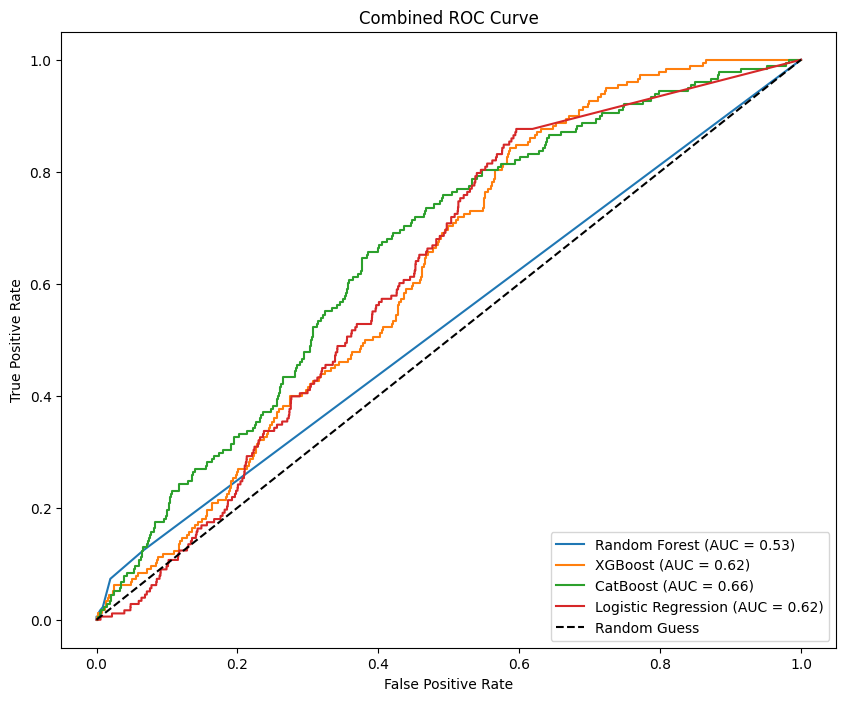


Training Random Forest...
name: Random Forest

Training XGBoost...


c:\Users\JoshL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:26:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


name: XGBoost

Training CatBoost...
name: CatBoost

Training Logistic Regression...


C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (stat

name: Logistic Regression


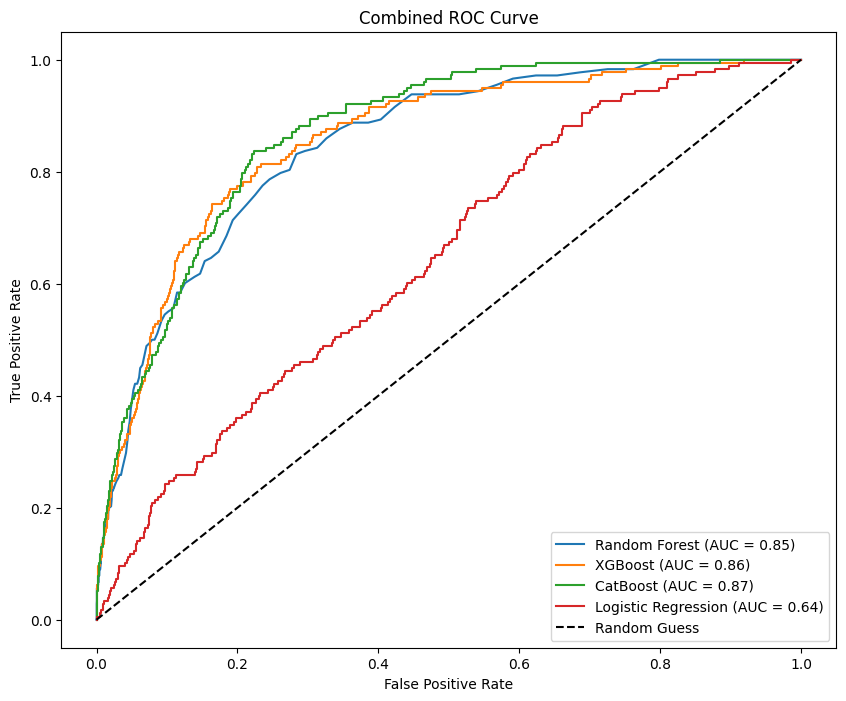


Training Random Forest...
name: Random Forest

Training XGBoost...


c:\Users\JoshL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


name: XGBoost

Training CatBoost...
name: CatBoost

Training Logistic Regression...


C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (stat

name: Logistic Regression


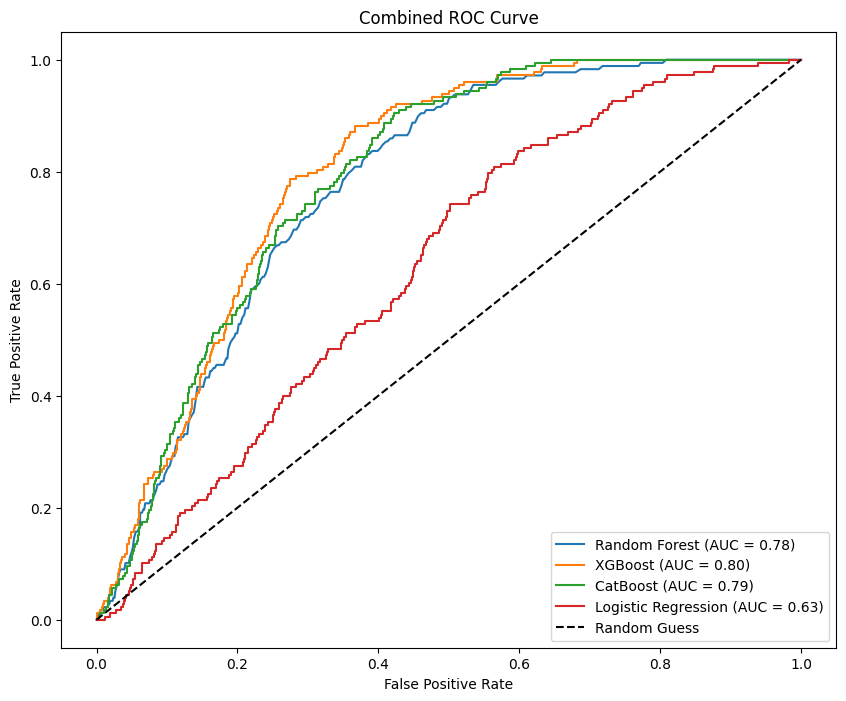


Training Random Forest...
name: Random Forest

Training XGBoost...


c:\Users\JoshL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


name: XGBoost

Training CatBoost...
name: CatBoost

Training Logistic Regression...


C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JoshL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (stat

name: Logistic Regression


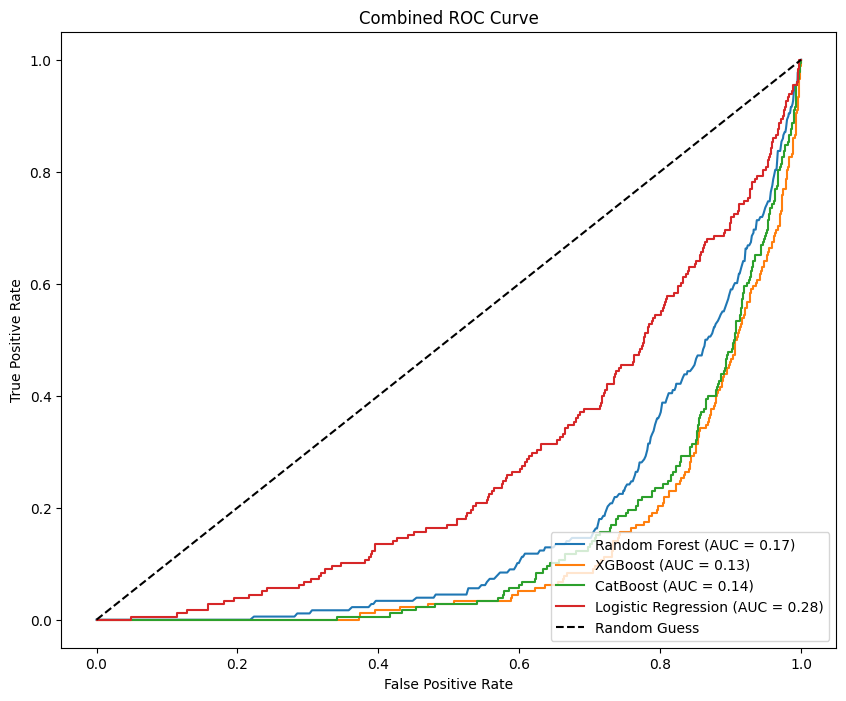

In [21]:
for label in range(4):
    plot_roc(label)

In [4]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=400, random_state=69),
    "XGBoost": xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=4,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=69),
    "CatBoost": CatBoostClassifier(
        iterations=400,
        depth=8,
        learning_rate=0.1,
        loss_function='MultiClass',
        verbose=False,
        random_state=69),
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        multi_class='ovr',
        class_weight='balanced')
}

In [6]:
X = df.drop(['popularity', 'pop_bucket'], axis=1)
y = df['pop_bucket']

# Identify and label encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

print(f"Categorical columns encoded: {categorical_cols}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Categorical columns encoded: ['artist_name', 'track_name', 'track_id', 'genre', 'decade']


In [7]:
def build_cumulative_curve(model, scale=100):
    # Fit model
    model.fit(X_train, y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probs = model.predict_proba(X_test)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probs)[::-1]
    Y_test_probs_sorted = Y_test_probs[order]
    Y_test_sorted = np.array(y_test)[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(Y_test_probs_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale

    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing threshold)")
    plt.ylabel("Percentage of population positives targeted (Recall)")
    plt.title("Cumulative response curve")
    plt.legend()

plot_cumulative_curve(models)

KeyboardInterrupt: 

In [ ]:
def plot_lift_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.legend()
    plt.grid()
    plt.xlim(0, 10)  # Set x-axis limits to 0-20

plot_lift_curve(models)

## NOTE, might want to focus on left side of plot: plt.xlim(0, 10)